In [1]:
# for basic operation
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


c:\Users\Vivobook\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
# Lets read the Dataset
data = pd.read_csv('bigmart.csv')

# lets check the shape of the dataset
data.shape

(8523, 12)

In [4]:
# Lest check the head of the dataset
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# Lets First Check for the Missing Values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
# Lets Input the Missing Values
data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].mean())
data['Outlet_Size'] = data["Outlet_Size"].fillna(data['Outlet_Size'].mode()[0])

# Lets Check the Missing Values again
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

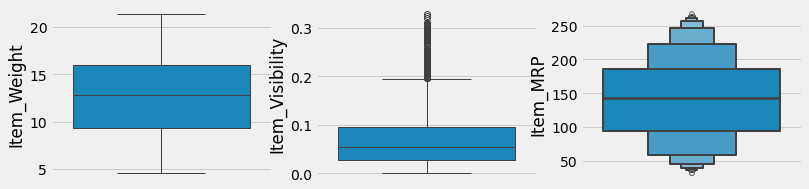

In [8]:
# Lets Check for Outliers in Item Weight, Item Visibility, and Item MRP

plt.rcParams['figure.figsize'] = (12,3)
plt.style.use('fivethirtyeight')

plt.subplot(1,3,1)
sns.boxplot(data['Item_Weight'])

plt.subplot(1,3,2)
sns.boxplot(data['Item_Visibility'])

plt.subplot(1,3,3)
sns.boxenplot(data['Item_MRP'])
plt.show()

In [9]:
data['Item_Visibility']

0       0.016047
1       0.019278
2       0.016760
3       0.000000
4       0.000000
          ...   
8518    0.056783
8519    0.046982
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility, Length: 8523, dtype: float64

<AxesSubplot:ylabel='Item_Visibility'>

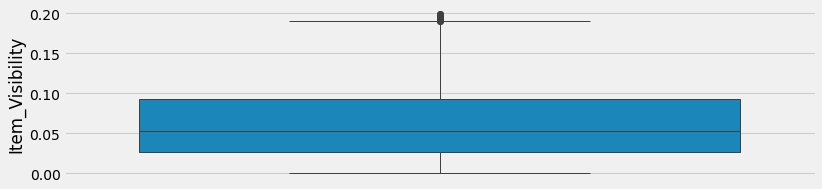

In [12]:
#Item Visibility has some Outliers, LET'S remove them
data = data[data['Item_Visibility'] <= 0.2]

# Lets check the Item Visibility again
sns.boxplot(data['Item_Visibility'])

In [13]:
# Now Lets Clean the Item Identifiers
data['Item_Identifier'] = data['Item_Identifier'].apply(lambda x: x[0:2])

# Lets check the values
data['Item_Identifier'].value_counts()

FD    6014
NC    1583
DR     790
Name: Item_Identifier, dtype: int64

In [14]:
# Lets Check the Item_Fat Content
data['Item_Fat_Content'].value_counts()


Low Fat    5023
Regular    2832
LF          307
reg         116
low fat     109
Name: Item_Fat_Content, dtype: int64